In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PLUME_function import *
import seaborn as sns
from scipy import stats
%matplotlib inline

# Nominal  Variables
We will study the effect of Qualitative Variables for object NO2.
And we could have the result for the other values by changing Object.


## Data importing

In [16]:
Xtrain,Ytrain,Xtest,VarNames = DataImporting()
Object = "NO2"
Hour = "1"

## Variable classification
### Counting

In [17]:
a = [var.split("_")[0] for var in VarNames]
a = np.array(a)
from collections import Counter
Counter(a)
#VarNames

Counter({'NO2': 11,
         'O3': 10,
         'PM10': 8,
         'PM2': 4,
         'cloudCover': 1,
         'date': 1,
         'day': 1,
         'dewPoint': 1,
         'hour': 1,
         'humidity': 1,
         'isPublicHollyday': 1,
         'isSaturday': 1,
         'isSundayOrPublicHollyday': 1,
         'month': 1,
         'precipIntensity': 1,
         'precipProbability': 1,
         'pressure': 1,
         'sunPower': 1,
         'temperature': 1,
         'windBearingCos': 17,
         'windBearingSin': 17,
         'windSpeed': 17})

#### Here, we will concentrate on the qualitative variables :

* day
* hour
* isPublicHollyday
* isSaturday
* isSundayOrPublicHollyday
* month

In [42]:
sns.set_style('darkgrid')

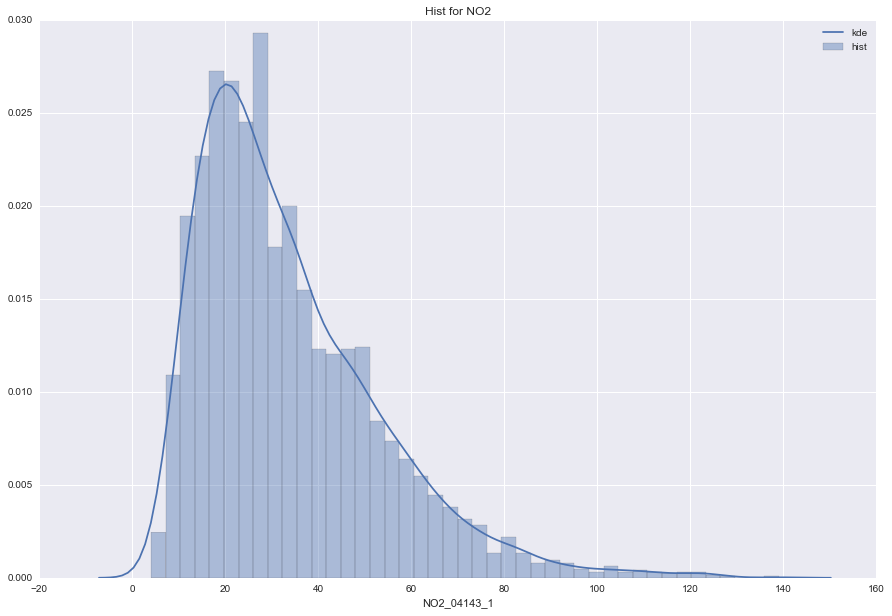

In [76]:
plt.figure(figsize=(15,10))
plt.title('Hist for '+Object)
data = Ytrain[ Object +'_04143_'+ Hour]
sns.distplot(data, norm_hist=True,kde_kws={"label":"kde"},hist_kws={'label':'hist'})


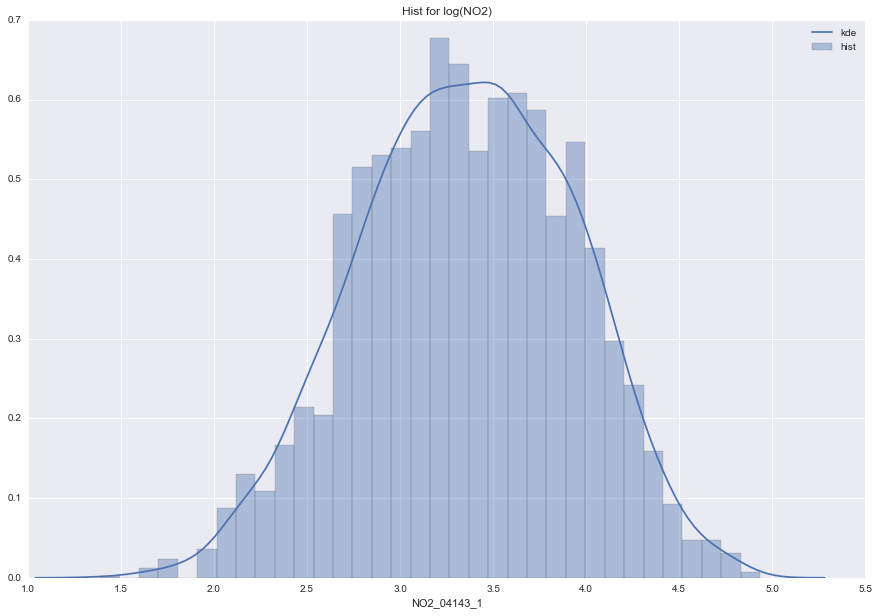

In [77]:
plt.figure(figsize=(15,10))
plt.title('Hist for log('+Object+")")
data = Ytrain[ Object +'_04143_'+ Hour]
data_log = np.log(data)
sns.distplot(data_log, norm_hist=True,kde_kws={"label":"kde"},hist_kws={'label':'hist'})

We could see that with the log transformation, it's more likely that the value we want to study is of a normal distribution, so we will use the log transformation.

## 1. Day
we will plot the boxplot of day vs all the 4 objects we want to predict (ie. NO2, O3 PM2_5 or PM_10). 

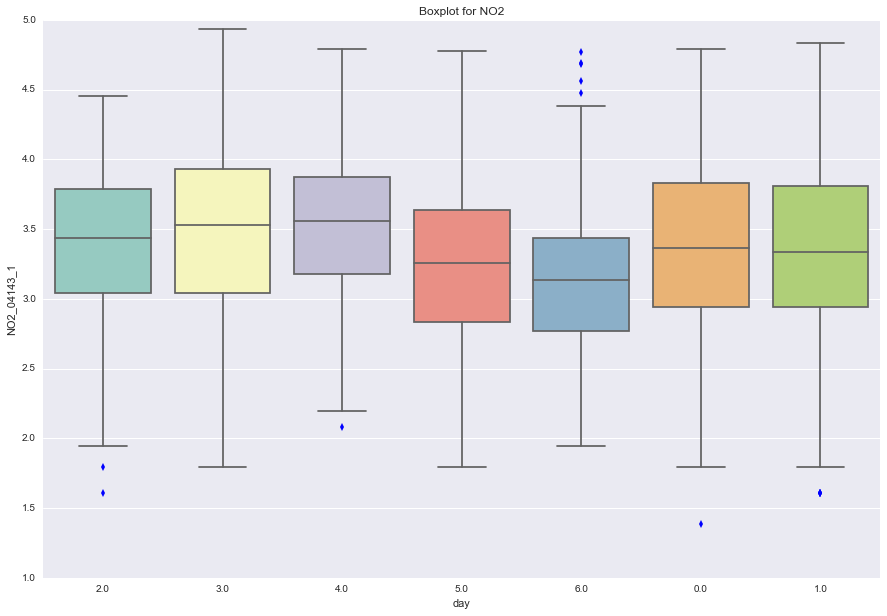

In [70]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.day,data_log,palette="Set3")

### Anova

In [46]:
var = 'day'
MyAnova(Xtrain,data_log,var)

IndexSet : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


F_onewayResult(statistic=32.747686824936054, pvalue=9.8670065524514968e-39)

## 2. Hour
we will plot the boxplot of hour vs all the 4 objects we want to predict (ie. NO2, O3 PM2_5 or PM_10). 

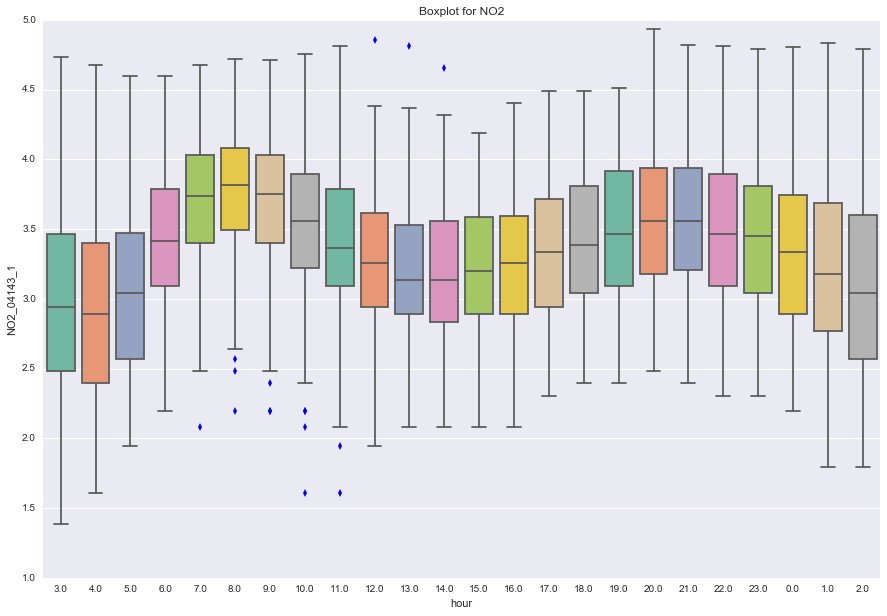

In [68]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.hour,data_log,palette="Set2")

### Anova

In [48]:
var = 'hour'
MyAnova(Xtrain,data_log,var,sub_group = ['13.0','14.0'])

IndexSet : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]


F_onewayResult(statistic=0.10635923932567379, pvalue=0.74453202527669082)

## 3. isPublicHollyday
we will plot the boxplot of isPublicHollyday vs all the 4 objects we want to predict (ie. NO2, O3 PM2_5 or PM_10). 

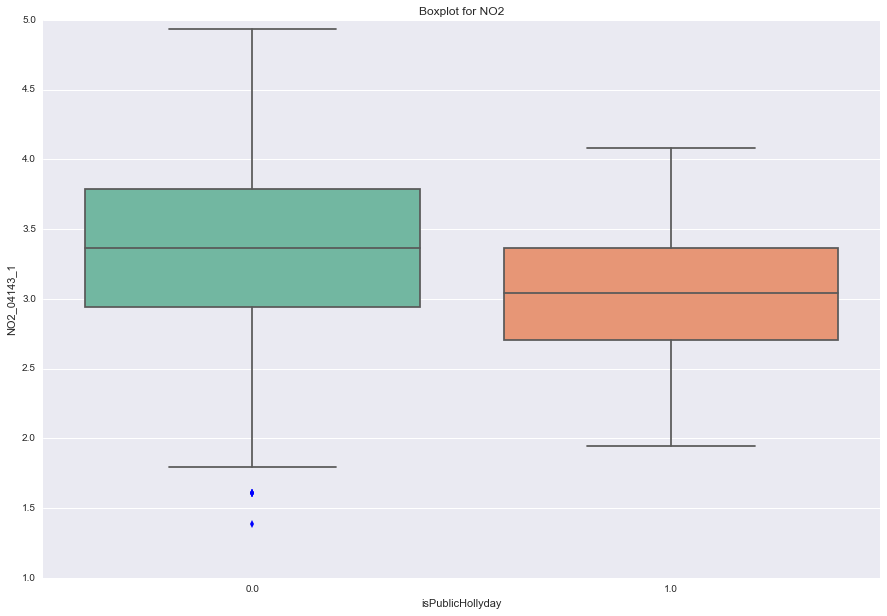

In [71]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.isPublicHollyday,data_log,palette="Set2")

### Anova

In [50]:
var = 'isPublicHollyday'
MyAnova(Xtrain,data_log,var)

IndexSet : [0.0, 1.0]


F_onewayResult(statistic=34.707881739007298, pvalue=4.143856781548233e-09)

## 4. isSaturday
we will plot the boxplot of isSaturday vs all the 4 objects we want to predict (ie. NO2, O3 PM2_5 or PM_10). 

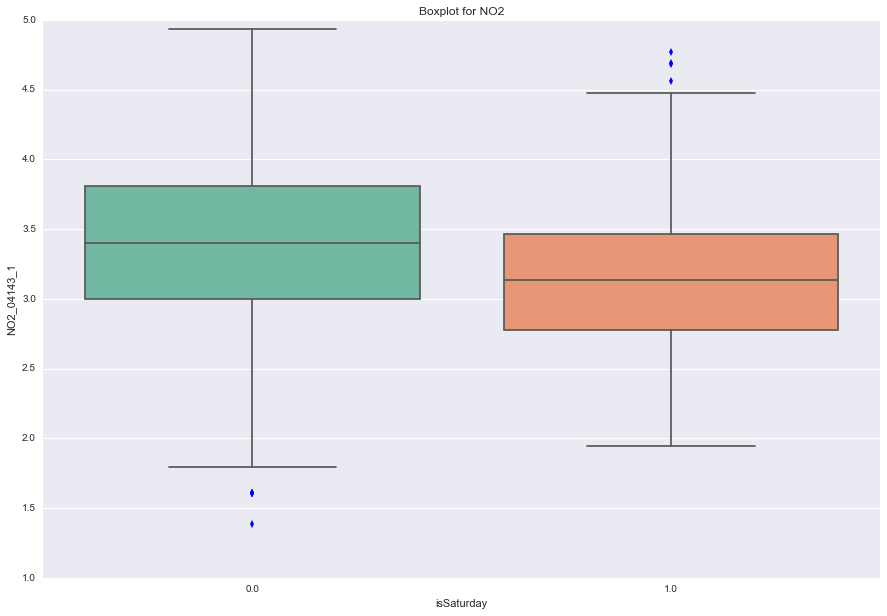

In [72]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.isSaturday,data_log,palette="Set2")

### Anova

In [52]:
var = 'isSaturday'
MyAnova(Xtrain,data_log,var)

IndexSet : [0.0, 1.0]


F_onewayResult(statistic=74.969844708162725, pvalue=6.8073380455404284e-18)

## 5. isSundayOrPublicHollyday
we will plot the boxplot of isSundayOrPublicHollyday vs all the 4 objects we want to predict (ie. NO2, O3 PM2_5 or PM_10). 

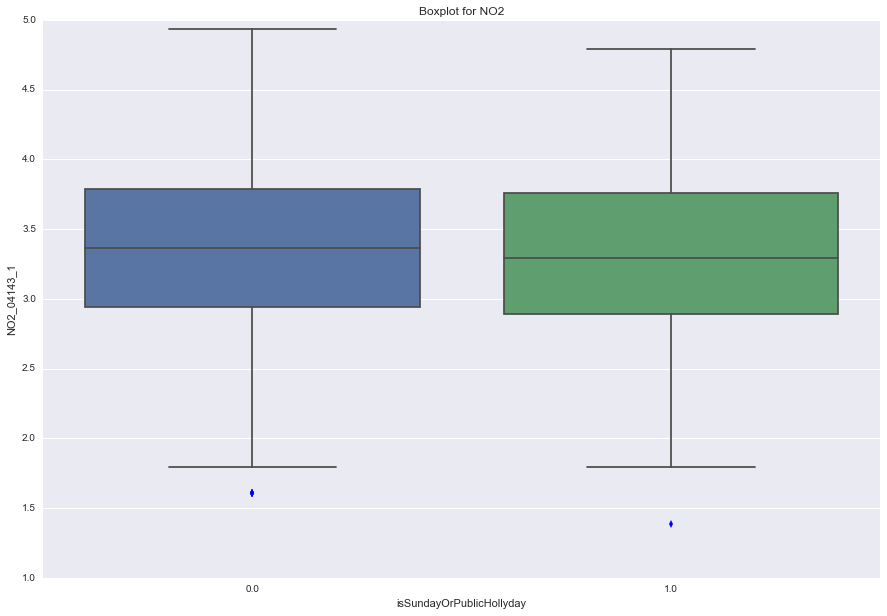

In [53]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.isSundayOrPublicHollyday,data_log)

### Anova

In [54]:
var = 'isSundayOrPublicHollyday'
MyAnova(Xtrain,data_log,var)

IndexSet : [0.0, 1.0]


F_onewayResult(statistic=7.3221957541484493, pvalue=0.0068395001885959662)

## 6. month
we will plot the boxplot of month vs all the 4 objects we want to predict (ie. NO2, O3 PM2_5 or PM_10). 

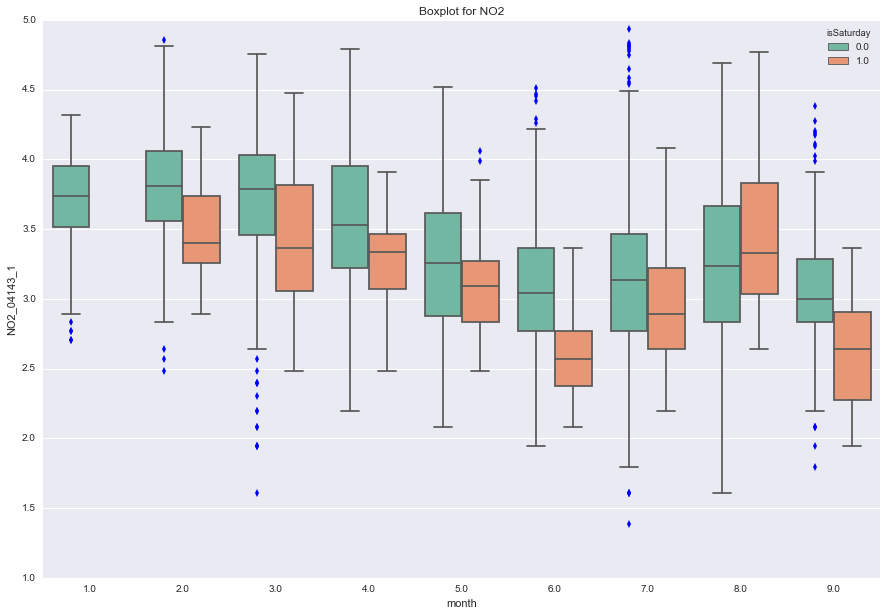

In [62]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.month,data_log,hue=Xtrain.isSaturday,palette="Set2")

### Anova

In [56]:
var = 'month'
MyAnova(Xtrain,data_log,var,['3.0','1.0'])

IndexSet : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


F_onewayResult(statistic=0.071579896051657002, pvalue=0.78913314770952658)

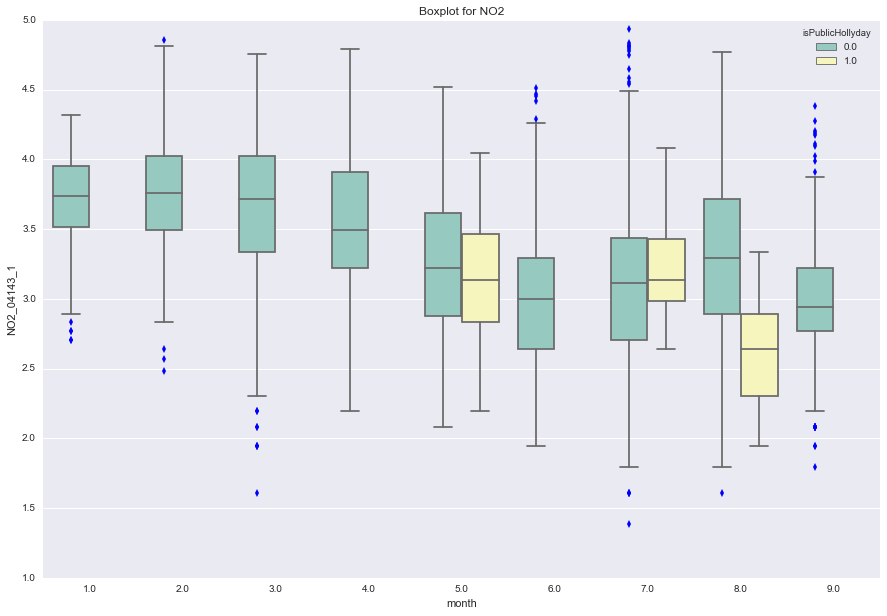

In [65]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.month,data_log,hue=Xtrain.isPublicHollyday,palette="Set3")

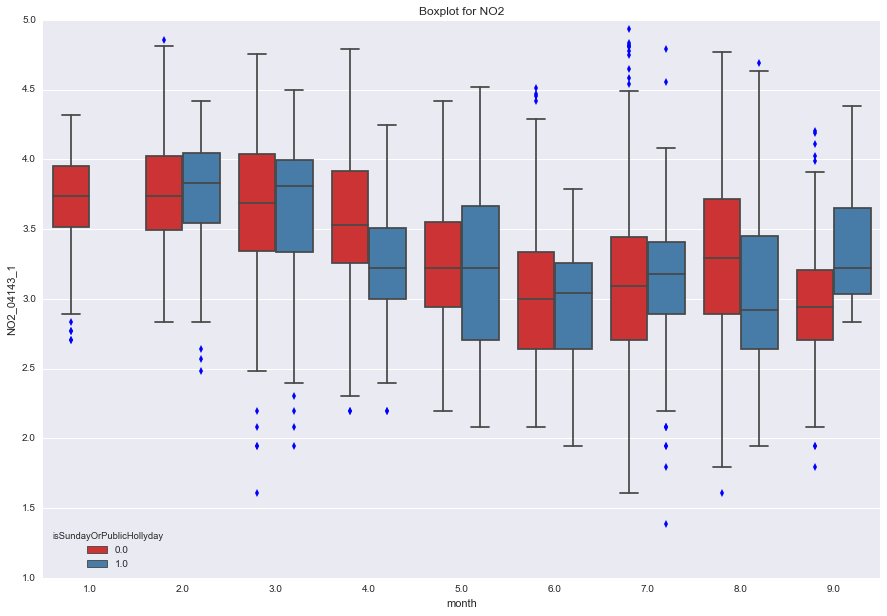

In [67]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.month,data_log,hue=Xtrain.isSundayOrPublicHollyday,palette="Set1")